In [1]:
import os
from google.cloud import bigquery
import pandas as pd

# dont forget to replace <andreasfreund> with your local username
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/caoshengyuan/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


In [4]:
%%bigquery df
SELECT *
FROM `broadband-data.CountyInfo.Density_Demographic_broadbnd_deployment_rate`

Downloading: 100%|██████████| 2833/2833 [00:01<00:00, 1588.55rows/s]


In [7]:
df_new = df.drop(['County_code', 'State_name','County_name', 'County_name'], axis=1)
df_new

,Broadband_deployment_rate,Population_density,Urban_density,Rural_density,Sex_male_density,Sex_female_density,Age_under_5_density,Age_between_5_and_17_density,Age_between_18_and_24_density,Age_between_25_and_44_density,...,Race_asian_density,Race_american_indian_alaska_natice_density,Race_native_hawaii_and_other_pacific_island_density,Degree_below_equal_high_school_density,Degree_above_high_school_density,Insurance_equal_one_density,Insurance_equal_above_two_density,Insurance_none_density,Status_rent_density,Status_own_density
0,75.747032,272.386051,185.379579,75.058556,131.032685,141.353365,18.556305,49.012514,29.857784,68.038642,...,5.536713,1.548359,0.121743,24.888631,329.670198,20.048080,61.315368,20.048080,28.093375,72.940922
1,75.055701,1256.203521,1142.270735,58.769825,605.253548,650.949973,77.551127,214.351097,137.101134,333.728563,...,54.295037,2.323949,0.241880,74.603506,1585.658863,68.350186,209.641543,68.350186,144.307748,331.383271
2,86.177858,182.642141,27.253834,90.256433,89.275481,93.366660,11.421161,28.433193,14.029273,41.565754,...,1.801183,0.872327,0.057638,19.806359,235.256627,14.968105,46.041555,14.968105,15.974551,55.059661
3,80.298140,9856.716956,9856.716956,0.000000,4655.789801,5200.927154,534.227726,1117.204777,1425.377168,3364.686225,...,341.015939,21.655446,3.538257,750.323521,15254.820057,443.723688,1734.466886,443.723688,2533.326781,1835.552935
4,69.642373,277.551884,209.454005,59.938254,134.717283,142.834601,14.942542,35.675490,60.313304,71.410440,...,14.572066,0.684924,0.136070,13.849408,361.157167,27.290607,44.397690,27.290607,52.310331,62.624207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,51.536287,1.961783,0.000000,0.459595,1.029619,0.932164,0.156947,0.364158,0.199138,0.535233,...,0.014128,0.015377,0.001634,0.115427,2.152368,0.265742,0.236525,0.265742,0.181166,0.543402
2829,35.905638,4.518362,0.000000,2.475235,2.358571,2.159791,0.278142,0.618621,0.307183,1.540669,...,0.045564,0.012017,0.002003,0.147207,7.035155,0.363011,0.826414,0.363011,0.759069,1.152623
2830,57.239819,7.964251,0.000000,4.379087,4.029280,3.934971,0.647168,1.748074,0.596164,2.054096,...,0.018765,0.042824,0.008180,0.349326,8.752400,0.995050,0.938273,0.995050,0.692878,2.167651
2831,25.394322,2.622242,0.000000,1.371002,1.311121,1.311121,0.181430,0.487984,0.134508,0.544289,...,0.011172,0.016087,0.000447,0.176067,2.912708,0.364200,0.424081,0.364200,0.258739,0.786047


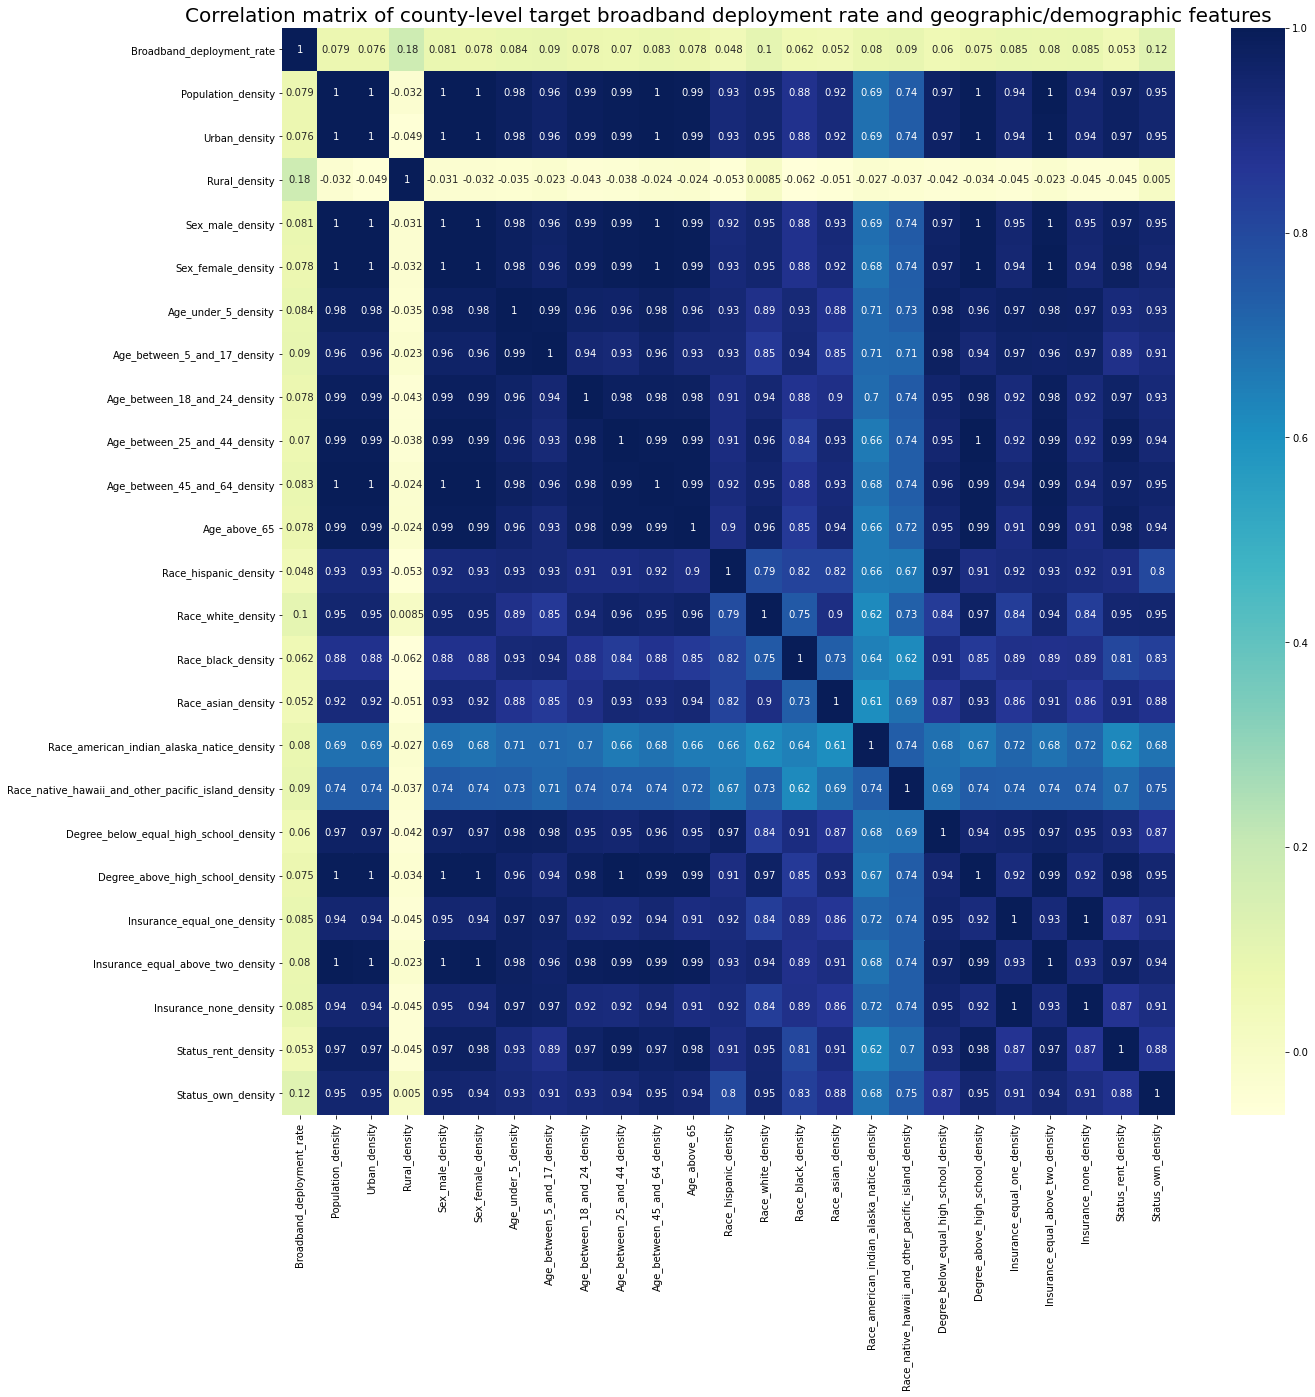

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),cmap="YlGnBu",annot=True)
plt.title("Correlation matrix of county-level target broadband deployment rate and geographic/demographic features", fontdict = {'fontsize' : 20})
plt.show()

# Top 5 features related to county-level deployment rate are: 
Rural_density                                   
Status_own_density                                    
Race_white_density                                     
Age_between_5_and_17_density                           
Race_native_hawaii_and_other_pacific_island_density

They are all positively correlated to county-level deployment rate.

In [40]:
df_new.corr().iloc[0].sort_values(ascending=False)[1:6]

Rural_density                                          0.181414
Status_own_density                                     0.120407
Race_white_density                                     0.101239
Age_between_5_and_17_density                           0.090343
Race_native_hawaii_and_other_pacific_island_density    0.089682
Name: Broadband_deployment_rate, dtype: float64

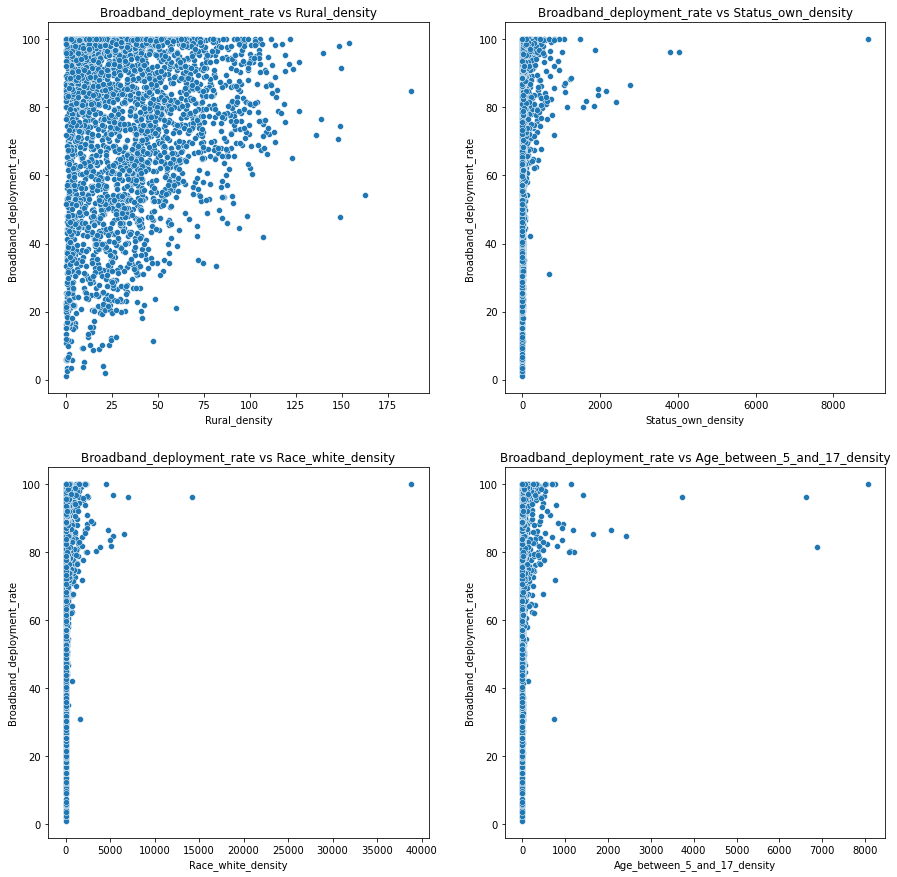

In [53]:
fig,ax = plt.subplots(2,2,figsize=(15,15))

sns.scatterplot(x=df_new["Rural_density"], y =df_new["Broadband_deployment_rate"], ax=ax[0,0]);
ax[0,0].set_xlabel('Rural_density');
ax[0,0].set_ylabel('Broadband_deployment_rate');
ax[0,0].set_title('Broadband_deployment_rate vs Rural_density');

sns.scatterplot(x=df_new["Status_own_density"], y =df_new["Broadband_deployment_rate"], ax=ax[0,1]);
ax[0,1].set_xlabel('Status_own_density');
ax[0,1].set_ylabel('Broadband_deployment_rate');
ax[0,1].set_title('Broadband_deployment_rate vs Status_own_density');


sns.scatterplot(x=df_new["Race_white_density"], y =df_new["Broadband_deployment_rate"], ax=ax[1,0]);
ax[1,0].set_xlabel('Race_white_density');
ax[1,0].set_ylabel('Broadband_deployment_rate');
ax[1,0].set_title('Broadband_deployment_rate vs Race_white_density');

sns.scatterplot(x=df_new["Age_between_5_and_17_density"], y =df_new["Broadband_deployment_rate"], ax=ax[1,1]);
ax[1,1].set_xlabel('Age_between_5_and_17_density');
ax[1,1].set_ylabel('Broadband_deployment_rate');
ax[1,1].set_title('Broadband_deployment_rate vs Age_between_5_and_17_density');

## Fit a linear regression model on the target variable and features

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=df_new.drop(columns=['Broadband_deployment_rate'])
y=df_new['Broadband_deployment_rate']
model.fit(X, y)

LinearRegression()

Top 3 features that are positively related to Broadband_deployment_rate are Age_under_5_density, Rural_density, and Race_native_hawaii_and_other_pacific_island_density. And top 3 features negatively related are Race_american_indian_alaska_natice_density, Age_between_25_and_44_density, and Age_between_45_and_64_density. 

In [82]:
data = {'feature': X.columns,
        'Linear regression coefficient': model.coef_}
  
# Linear coefficient table
coefficient_table = pd.DataFrame(data)
coefficient_table.sort_values(by = ['Linear regression coefficient'], ascending=False)

,feature,Linear regression coefficient
5,Age_under_5_density,0.225318
2,Rural_density,0.117334
16,Race_native_hawaii_and_other_pacific_island_de...,0.105193
23,Status_own_density,0.080685
22,Status_rent_density,0.068988
3,Sex_male_density,0.061486
0,Population_density,0.056093
10,Age_above_65,0.020068
6,Age_between_5_and_17_density,0.014319
20,Insurance_equal_above_two_density,0.010636
